In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
import numpy as np

In [2]:
df = pd.read_csv("./datasets/high_diamond_ranked_10min.csv")

In [3]:
df.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  ...  \
0          9           6           11                  0            0  ...   
1          5           5            5                  0            0  ...   
2          7          11            4                  1            1  ...   
3          4           5            5                  1            0  ...   
4          6           6            6                  0            0  ...   

   redTowersDestroyed  redTotalGold  redAvgLevel  redTotalExperience  \
0                   0         16567          6.8               17047   
1                   1         17620          6.8               17438   
2                   0         17285          6.8               17254   
3                   0         16478          7.0               17961   
4                   0         17404          7.0               18313   

   redTotalMinionsKilled  redTotalJungleMinionsKilled  redGoldDiff  \
0                    197                           55         -643   
1                    240                           52         2908   
2                    203                           28         1172   
3                    235                           47         1321   
4                    225                           67         1004   

   redExperienceDiff  redCSPerMin  redGoldPerMin  
0                  8         19.7         1656.7  
1               1173         24.0         1762.0  
2               1033         20.3         1728.5  
3                  7         23.5         1647.8  
4               -230         22.5         1740.4  

[5 rows x 40 columns]

In [4]:
pprint(list(df.columns))

['gameId',
 'blueWins',
 'blueWardsPlaced',
 'blueWardsDestroyed',
 'blueFirstBlood',
 'blueKills',
 'blueDeaths',
 'blueAssists',
 'blueEliteMonsters',
 'blueDragons',
 'blueHeralds',
 'blueTowersDestroyed',
 'blueTotalGold',
 'blueAvgLevel',
 'blueTotalExperience',
 'blueTotalMinionsKilled',
 'blueTotalJungleMinionsKilled',
 'blueGoldDiff',
 'blueExperienceDiff',
 'blueCSPerMin',
 'blueGoldPerMin',
 'redWardsPlaced',
 'redWardsDestroyed',
 'redFirstBlood',
 'redKills',
 'redDeaths',
 'redAssists',
 'redEliteMonsters',
 'redDragons',
 'redHeralds',
 'redTowersDestroyed',
 'redTotalGold',
 'redAvgLevel',
 'redTotalExperience',
 'redTotalMinionsKilled',
 'redTotalJungleMinionsKilled',
 'redGoldDiff',
 'redExperienceDiff',
 'redCSPerMin',
 'redGoldPerMin']


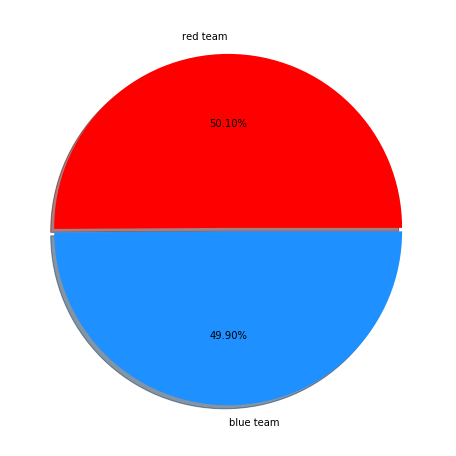

In [5]:
plt.figure(figsize=(8,8))
plt.pie(df["blueWins"].value_counts(), explode=(0,.02), autopct="%.2f%%", shadow=True, labels=["red team", "blue team"], colors=["red", "#1E90FF"])
plt.show()

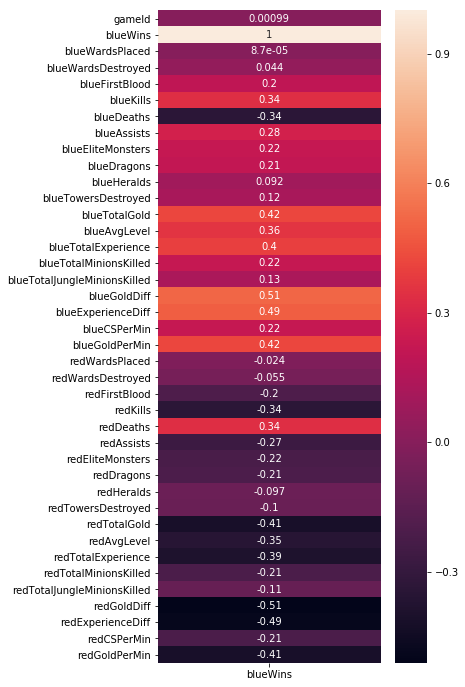

In [6]:
win_correlation = df.corr()
for col in win_correlation.columns[2:]:
    win_correlation.pop(col)
win_correlation.pop("gameId")

plt.figure(figsize=(5,12))
sns.heatmap(win_correlation, annot=True,)
plt.show()

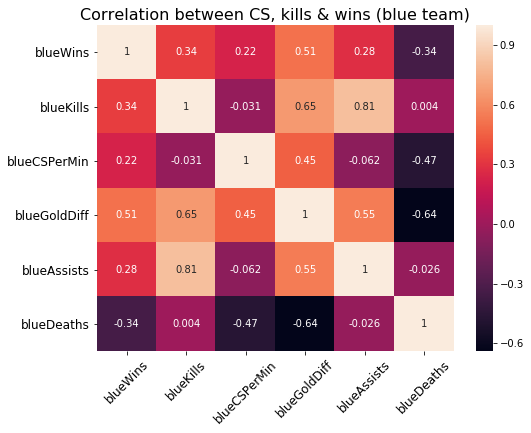

In [7]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['blueWins', 'blueKills','blueCSPerMin', 'blueGoldDiff', 'blueAssists', 'blueDeaths']].corr(), annot=True)
plt.title("Correlation between CS, kills & wins (blue team)", fontsize=16)
plt.yticks(rotation=0, fontsize=12)
plt.xticks(rotation=45, fontsize=12)
plt.show()

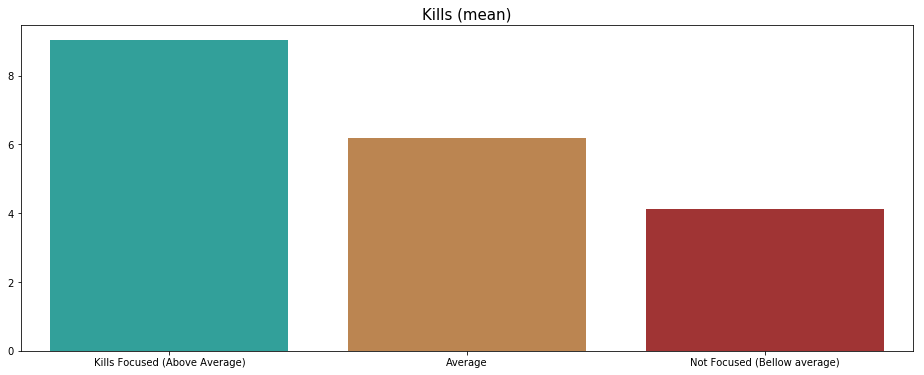

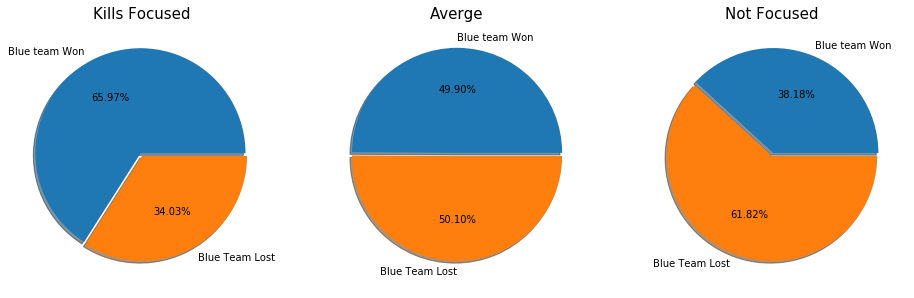

In [9]:
blue_focus_on_kills = df[df["blueKills"] > df["blueKills"].mean()]
blue_no_focus_on_kills = df[df["blueKills"] <= df["blueKills"].mean()]

blue_focus_on_kills_win_lose = len(blue_focus_on_kills[blue_focus_on_kills["blueWins"] == 1]), len(blue_focus_on_kills[blue_focus_on_kills["blueWins"] == 0])
blue_avg_kills_win_lose = len(df[df["blueWins"] == 1]), len(df[df["blueWins"] == 0])
blue_no_focus_on_kills_win_lose = len(blue_no_focus_on_kills[blue_no_focus_on_kills["blueWins"] == 1]), len(blue_no_focus_on_kills[blue_no_focus_on_kills["blueWins"] == 0])


plt.figure(figsize=(16,6))
colors = ["#20B2AA", "#CD853F", "#B22222"]
sns.barplot(x=["Kills Focused (Above Average)",
               "Average",
               "Not Focused (Bellow average)"],
            y=[blue_focus_on_kills["blueKills"].mean(),
               df["blueKills"].mean(),
               blue_no_focus_on_kills["blueKills"].mean()],
            palette=sns.color_palette(colors))
plt.title("Kills (mean)", fontsize=15)

f, axs = plt.subplots(1,3, figsize=(16,8))
axs[0].pie(blue_focus_on_kills_win_lose, autopct="%.2f%%", labels=["Blue team Won", "Blue Team Lost"], explode=[.03, 0], shadow=True, )
axs[0].set_title("Kills Focused", fontsize=15)

axs[1].pie(blue_avg_kills_win_lose, autopct="%.2f%%", labels=["Blue team Won", "Blue Team Lost"], explode=[.03, 0], shadow=True, )
axs[1].set_title("Averge", fontsize=15)

axs[2].pie(blue_no_focus_on_kills_win_lose, autopct="%.2f%%", labels=["Blue team Won", "Blue Team Lost"], explode=[.03, 0], shadow=True, )
axs[2].set_title("Not Focused", fontsize=15)

plt.show()


In [10]:
df["blueHeralds"].sum() / len(df), df["redHeralds"].sum() / len(df)

(0.18797449134527786, 0.16003644093531735)

In [12]:
df["blueDragons"].sum() / len(df), df["redDragons"].sum() / len(df)

(0.3619799574855755, 0.41309849175017715)

# Próximas hipóteses
* Probabilidade de vencer um jogo com desvantagem de ouro aos 10 minutos 
* Punições pra mortes (possibilidade de roaming, objetivos, etc)
* O quão as wards evitam um possivel first blood
* O quão tomar um FB é prejudicial
  * quais objetivos eles pegam na jg
  * o quanto eles escalam em gold
  * torres levadas
  * o quanto intefere na lane (experiência e cs por minuto)

In [174]:
blue_probability_of_comeback_x = []
blue_probability_of_comeback_y = []
for i in range(-500, -10500, -500):
    blue_gold_disadvantage_limited = blue_gold_disadvantage[blue_gold_disadvantage["blueGoldDiff"] >= i]
    blue_probability_of_comeback_x.append(i)
    probability = len(blue_gold_disadvantage_limited[blue_gold_disadvantage_limited["blueWins"] == 1]) / len(blue_gold_disadvantage_limited)
    blue_probability_of_comeback_y.append(probability)

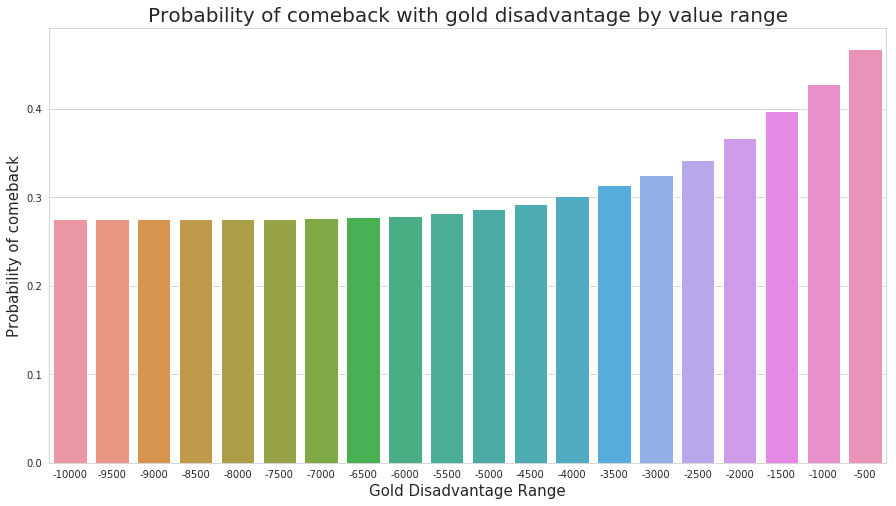

In [175]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,8))
sns.barplot(x=blue_probability_of_comeback_x, y=blue_probability_of_comeback_y)
plt.title("Probability of comeback with gold disadvantage by value range", fontsize=20)
plt.xlabel("Gold Disadvantage Range", fontsize=15)
plt.ylabel("Probability of comeback", fontsize=15)
plt.show()